# Load Packages

In [1]:
import sys
import os
import math
import random
import array
from datetime import datetime

import numpy as np
import pandas as pd 

from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import expon
from scipy.stats import pareto
import scipy.sparse as sp
import scipy.linalg as la
from scipy.stats import dirichlet
 

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
from itertools import product


from tqdm import trange, notebook

pd.set_option('display.max_columns', None)


In [2]:
os.chdir('D:/Dropbox/Dropbox/uchicago_fourth/uncertaintyInequality')
os.getcwd()

'D:\\Dropbox\\Dropbox\\uchicago_fourth\\uncertaintyInequality'

In [3]:
# Get dat a
people_of_india_datadir = 'pyramid/people_of_india/'
zipFiles = os.listdir(people_of_india_datadir)
zipFiles

['people_of_india_20140101_20140430_R_csv.zip',
 'people_of_india_20140501_20140831_R_csv.zip',
 'people_of_india_20140901_20141231_R_csv.zip',
 'people_of_india_20150101_20150430_R_csv.zip',
 'people_of_india_20150501_20150831_R_csv.zip',
 'people_of_india_20150901_20151231_R_csv.zip',
 'people_of_india_20160101_20160430_R_csv.zip',
 'people_of_india_20160501_20160831_R_csv.zip',
 'people_of_india_20160901_20161231_R_csv.zip',
 'people_of_india_20170101_20170430_R_csv.zip',
 'people_of_india_20170501_20170831_R_csv.zip',
 'people_of_india_20170901_20171231_R_csv.zip',
 'people_of_india_20180101_20180430_R_csv.zip',
 'people_of_india_20180501_20180831_R_csv.zip',
 'people_of_india_20180901_20181231_R_csv.zip',
 'people_of_india_20190101_20190430_R_csv.zip',
 'people_of_india_20190501_20190831_R_csv.zip',
 'people_of_india_20190901_20191231_R_csv.zip',
 'people_of_india_20200101_20200430_R_csv.zip',
 'people_of_india_20200501_20200831_R_csv.zip',
 'people_of_india_20200901_20201231_R_cs

# Plots

people_of_india_20150101_20150430_R_csv.zip
All data
RELATION_WITH_HOH
['HOH' 'Son' 'Daughter' 'Spouse' 'Daughter-in-law' 'Grandchild'
 'Not Applicable' 'Parent' 'Data Not Available' 'Brother/Sister'
 'Son-in-law' 'Brother/Sister-in-law' 'Relative' 'Domestic help' 'Inlaw'
 'Friend' 'Other non-relatives']


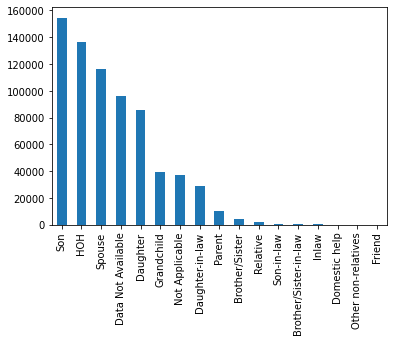

STATE_OF_ORIGIN
['Jammu & Kashmir' 'Not Applicable' 'Data Not Available'
 'Himachal Pradesh' 'West Bengal' 'Punjab' 'Uttar Pradesh' 'Chandigarh'
 'Uttarakhand' 'Bihar' 'Haryana' 'Rajasthan' 'Tamil Nadu' 'Maharashtra'
 'Gujarat' 'Assam' 'Andhra Pradesh' 'Odisha' 'Delhi' 'Madhya Pradesh'
 'Kerala' 'Jharkhand' 'Karnataka' 'Goa' 'Foreign' 'Tripura' 'Sikkim'
 'Meghalaya' 'Manipur' 'Chhattisgarh' 'Andaman & Nicobar Islands'
 'Puducherry']


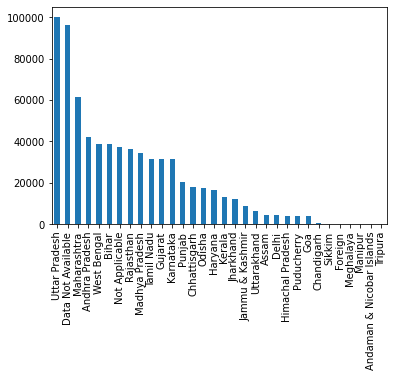

MEMBER_STATUS
['Member of the household' 'Emigrated' 'Unaccounted for and deleted'
 'Dead' 'Unaccounted for and added']


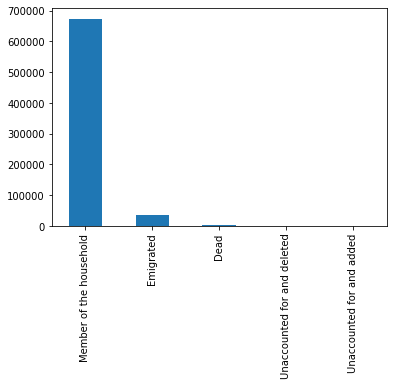

RELIGION
['Muslim' 'Not Applicable' 'Data Not Available' 'Religion not stated'
 'Sikh' 'Hindu' 'Christian' 'Buddhist' 'Jain' 'Other Religion']


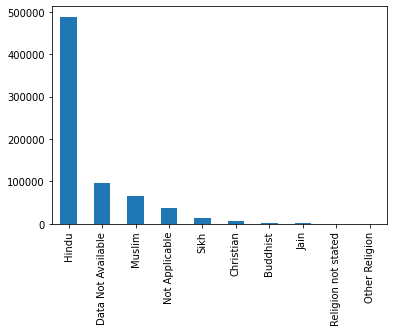

CASTE
['Other ST' 'Not Applicable' 'Caste not stated' 'Gujjar'
 'Other OBC (Pasmanda)' 'Ashraf (Sayyad Shaikh)' 'Data Not Available'
 'Mughal (Khan)' 'Jat' 'Other Upper Castes' 'Brahmin' 'Vaishya/Bania'
 'Rajputs' 'Weaver and Craftsmen OBC (Bunkar/Darzee/Lohar/Sonar/etc)'
 'Megh' 'Doom' 'Khatris' 'Chama' 'Service OBC (Kewat/Nai/Teli/Jogi)'
 'Other SC' 'Other OBC'
 'Weaver and Craftsmen OBC (Bunkar/Darzee/Kumhar/Lohar/Sonar/etc)' 'Lohar'
 'Kori' 'Chamar' 'Arora/Khatri' 'Bagdi' 'Julaha' 'Kanaura/Kinnara'
 'Balmiki' 'Dhobi' 'Bishnoi' 'Yadav'
 'Weavers and Craftsmen OBC  (Gaderia, Chhimbe, Ramgarhia, Ghumia/Parjapat, Lohar, Suniar, Daoli,'
 'Khatik' 'Pasi' 'Balai'
 'Weaver and Craftsmen OBC (Bhavsar/Darzee/Lohar/Prajapati/Sonar/etc)'
 'Kamboj'
 'Service OBC (Nai/Napit/Dhobi(non-SC)/Kewat, Jogi, etc.) (Pasmanda)'
 'Adi Dravida' 'Arunthathiyar' 'Teli'
 'Weaver and Craftsmen OBC (Khati/Bunkar/Darzee/Lohar/Sonar/etc)' 'Mahar'
 'Kayastha'
 'Service OBC (Dhobi, Nai, Penja, Bairagi, Labana, Bharb

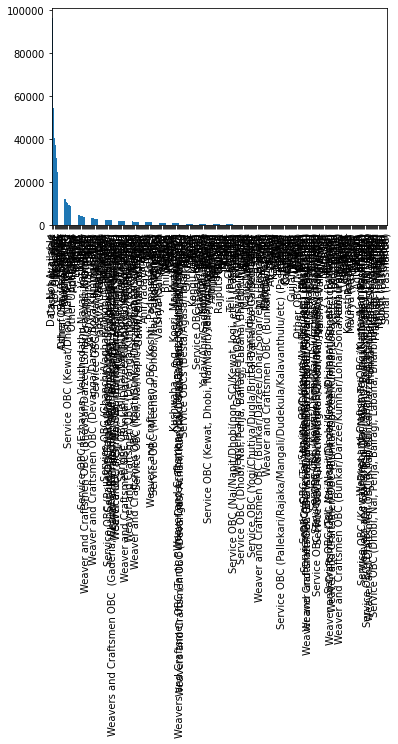

CASTE_CATEGORY
['ST' 'Not Applicable' 'OBC' 'Intermediate Caste' 'Upper Caste'
 'Not Stated' 'Data Not Available' 'SC']


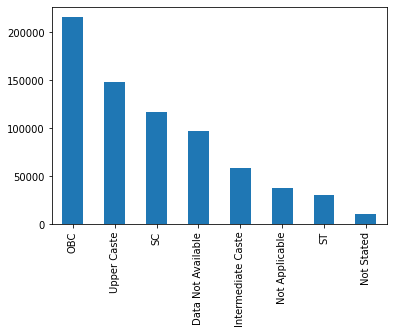

EDUCATION
['Graduate' '5th Std. Pass' '12th Std. Pass' '9th Std. Pass'
 '6th Std. Pass' '3rd Std. Pass' 'Post Graduate' '4th Std. Pass'
 '1st Std. Pass' '10th Std. Pass' 'No Education' '11th Std. Pass'
 '2nd Std. Pass' 'Not Applicable' '8th Std. Pass' '7th Std. Pass'
 'Diploma / certificate course' 'Data Not Available' 'Ph.D / M.Phil']


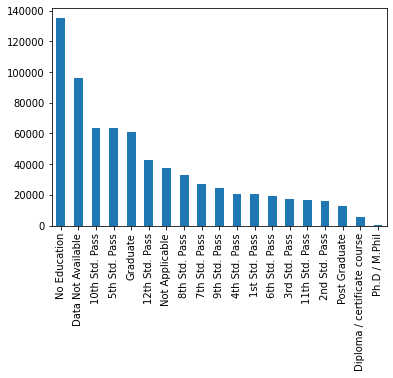

DISCIPLINE
['Arts' 'Not Applicable' 'Data Not Available' 'Science' 'Commerce'
 'Hotel Management' 'Management Studies in Others' 'Engineering' 'Law'
 'Computer Application' 'Physiotherapy' 'Dentist'
 'Management Studies in Finance' 'Mass Media/ Communication' 'Medicine'
 'Management Studies in Marketing' 'Others' 'Education' 'Architecture'
 'Pharmacy' 'Homeopathy'
 'Ayurvedic Medicine/Yunani Medicine/Naturopathy/Yogic Science'
 'Fine Arts' 'Veterinary Science' 'Fashion/Interior/Apparel Design'
 'Management Studies in Human Resource (HR)'
 'Management Studies in Operation']


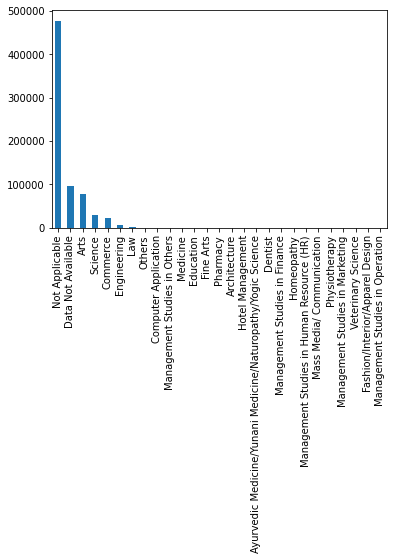

NATURE_OF_OCCUPATION
['White-Collar Professional Employees and Other Employees' 'Student'
 'Support Staff' 'Home Maker' 'NonSchooling Child' 'Wage Labourer'
 'Not Applicable'
 'Small Trader/Hawker/ Businessman without Fixed Premises'
 'White Collar Clerical Employees' 'Small Farmer' 'Organised Farmer'
 'Agricultural Labourer' 'Self Employed Entrepreneur' 'Unoccupied'
 'Retired/Aged' 'Businessman' 'Non-Industrial Technical Employee'
 'Data Not Available' 'Legislator/Social Worker/ Activists'
 'Qualified Self Employed Professionals' 'Home-based Worker'
 'Industrial Workers' 'Manager']


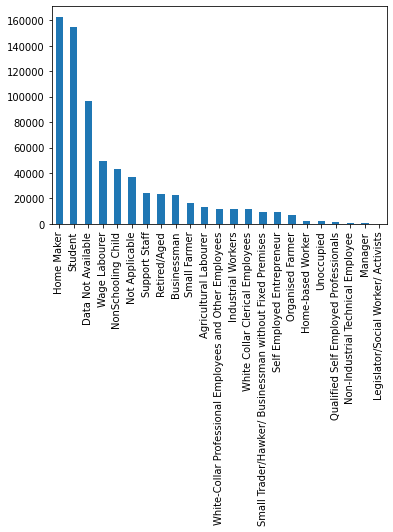

INDUSTRY_OF_OCCUPATION
['Defence Services' 'Not Applicable' 'Education' 'Travel and Tourism'
 'Real Estate & Construction' 'Retail Trade'
 'Public Administrative Services' 'Crop Cultivation'
 'Forestry including Wood Cutting' 'Fruits and Vegetable Farming'
 'Wholesale Trade' 'Health Care'
 'Automobiles and Other Transport Equipment Manufacturers'
 'Personal Professional Services' 'Communication, Post & Courier'
 'Data Not Available' 'Textile Industries' 'Hotels and Restaurants'
 'Food Industries' 'Financial Services'
 'Personal Non-Professional Services' 'Chemical Industries' 'Utilities'
 'Metal Industries' 'Machinery Manufacturers'
 'Pharmaceutical Manufacturer'
 'Cement, Tiles, Bricks, Ceramics, Glass and other construction materials'
 'Fishing' 'Media and Publishing' 'IT & ITES'
 'Soaps, Detergents, Cosmetics, Toiletries' 'Mines' 'Gems & Jewellery'
 'Footwear and other Leather Industries' 'Entertainment and Sports'
 'Poultry Farming, Animal Husbandry and Vermiculture']


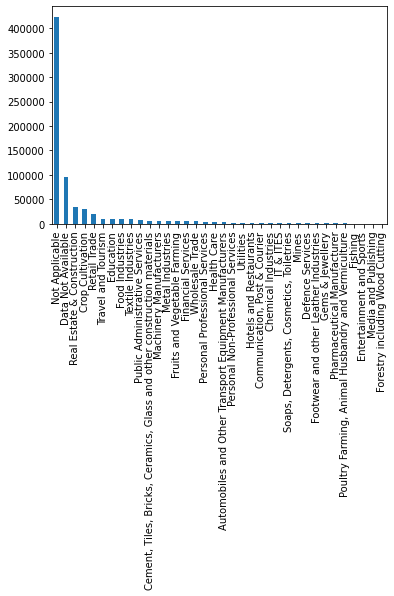

AGE_YRS
[  58   12   24   23   19   20   21   13   10   48   46   11    7   36
   34    4   66   55   26   28    5 -100   63   52   22   27   39   38
    9   51   49   18   15   25   43   17   56   33   73   68   44   29
   30    6   16   14    8   32    2   42   62   57   50   47   84   41
   86   76   70   45   67   54    3   71   37   40   31   35   69   53
    1   59   61  -99   74   75   64   78   77   65   60   88   90   72
   82    0   79   87   83   85   91   81  109   80   89   93   92   97
  101  107  102   95   94   98   96   99  100  106  103  104  105]


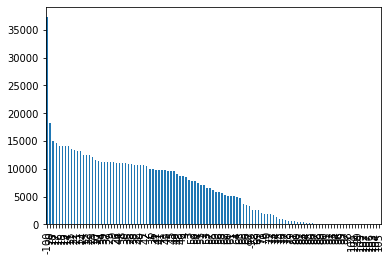

number of unique HH ind 158443
Known relation to HoH
RELATION_WITH_HOH
['HOH' 'Son' 'Daughter' 'Spouse' 'Daughter-in-law' 'Grandchild'
 'Not Applicable' 'Parent' 'Brother/Sister' 'Son-in-law'
 'Brother/Sister-in-law' 'Relative' 'Domestic help' 'Inlaw' 'Friend'
 'Other non-relatives']


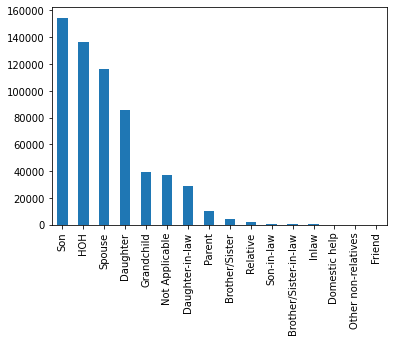

STATE_OF_ORIGIN
['Jammu & Kashmir' 'Not Applicable' 'Himachal Pradesh' 'West Bengal'
 'Punjab' 'Uttar Pradesh' 'Chandigarh' 'Uttarakhand' 'Bihar' 'Haryana'
 'Rajasthan' 'Tamil Nadu' 'Maharashtra' 'Gujarat' 'Assam' 'Andhra Pradesh'
 'Odisha' 'Delhi' 'Madhya Pradesh' 'Kerala' 'Jharkhand' 'Karnataka' 'Goa'
 'Foreign' 'Tripura' 'Sikkim' 'Meghalaya' 'Manipur' 'Chhattisgarh'
 'Andaman & Nicobar Islands' 'Puducherry']


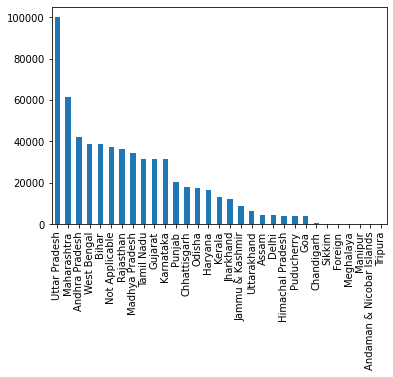

MEMBER_STATUS
['Member of the household' 'Emigrated' 'Unaccounted for and deleted'
 'Dead']


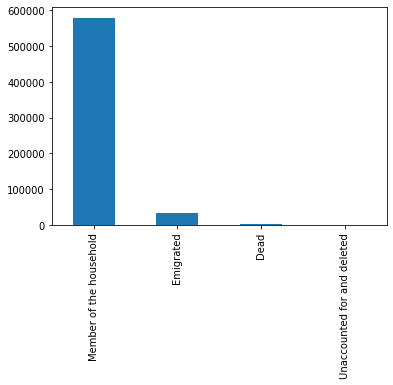

RELIGION
['Muslim' 'Not Applicable' 'Religion not stated' 'Sikh' 'Hindu'
 'Christian' 'Buddhist' 'Jain' 'Other Religion']


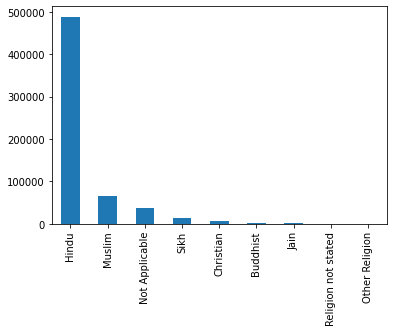

CASTE
['Other ST' 'Not Applicable' 'Caste not stated' 'Gujjar'
 'Other OBC (Pasmanda)' 'Ashraf (Sayyad Shaikh)' 'Mughal (Khan)' 'Jat'
 'Other Upper Castes' 'Brahmin' 'Vaishya/Bania' 'Rajputs'
 'Weaver and Craftsmen OBC (Bunkar/Darzee/Lohar/Sonar/etc)' 'Megh' 'Doom'
 'Khatris' 'Chama' 'Service OBC (Kewat/Nai/Teli/Jogi)' 'Other SC'
 'Other OBC'
 'Weaver and Craftsmen OBC (Bunkar/Darzee/Kumhar/Lohar/Sonar/etc)' 'Lohar'
 'Kori' 'Chamar' 'Arora/Khatri' 'Bagdi' 'Julaha' 'Kanaura/Kinnara'
 'Balmiki' 'Dhobi' 'Bishnoi' 'Yadav'
 'Weavers and Craftsmen OBC  (Gaderia, Chhimbe, Ramgarhia, Ghumia/Parjapat, Lohar, Suniar, Daoli,'
 'Khatik' 'Pasi' 'Balai'
 'Weaver and Craftsmen OBC (Bhavsar/Darzee/Lohar/Prajapati/Sonar/etc)'
 'Kamboj'
 'Service OBC (Nai/Napit/Dhobi(non-SC)/Kewat, Jogi, etc.) (Pasmanda)'
 'Adi Dravida' 'Arunthathiyar' 'Teli'
 'Weaver and Craftsmen OBC (Khati/Bunkar/Darzee/Lohar/Sonar/etc)' 'Mahar'
 'Kayastha'
 'Service OBC (Dhobi, Nai, Penja, Bairagi, Labana, Bharbhunja, etc.)'
 'Mazha

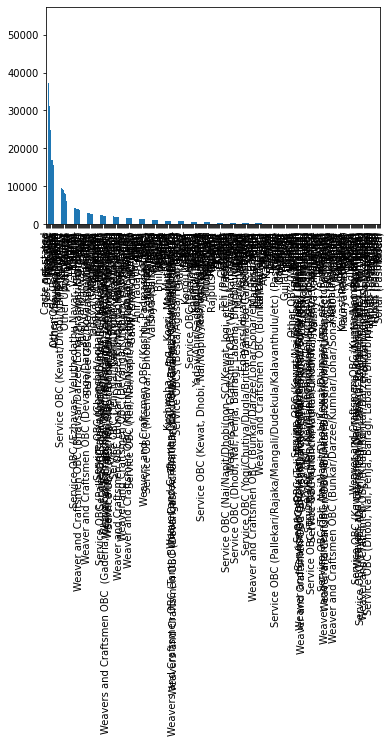

CASTE_CATEGORY
['ST' 'Not Applicable' 'OBC' 'Intermediate Caste' 'Upper Caste'
 'Not Stated' 'SC']


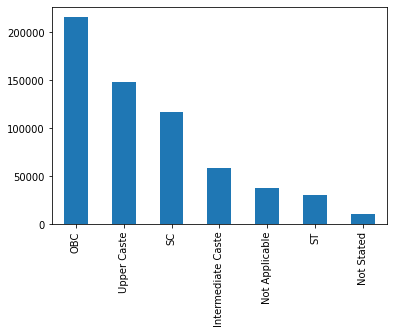

EDUCATION
['Graduate' '5th Std. Pass' '12th Std. Pass' '9th Std. Pass'
 '6th Std. Pass' '3rd Std. Pass' 'Post Graduate' '4th Std. Pass'
 '1st Std. Pass' '10th Std. Pass' 'No Education' '11th Std. Pass'
 '2nd Std. Pass' 'Not Applicable' '8th Std. Pass' '7th Std. Pass'
 'Diploma / certificate course' 'Ph.D / M.Phil']


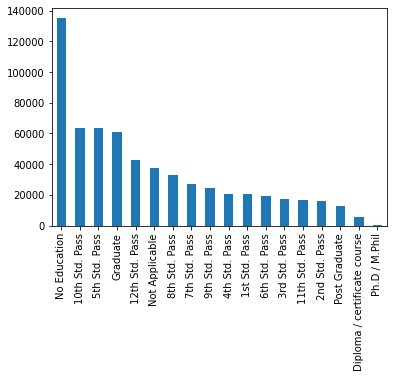

DISCIPLINE
['Arts' 'Not Applicable' 'Science' 'Commerce' 'Hotel Management'
 'Management Studies in Others' 'Engineering' 'Law' 'Computer Application'
 'Physiotherapy' 'Dentist' 'Management Studies in Finance'
 'Mass Media/ Communication' 'Medicine' 'Management Studies in Marketing'
 'Others' 'Education' 'Architecture' 'Pharmacy' 'Homeopathy'
 'Ayurvedic Medicine/Yunani Medicine/Naturopathy/Yogic Science'
 'Fine Arts' 'Veterinary Science' 'Fashion/Interior/Apparel Design'
 'Management Studies in Human Resource (HR)'
 'Management Studies in Operation']


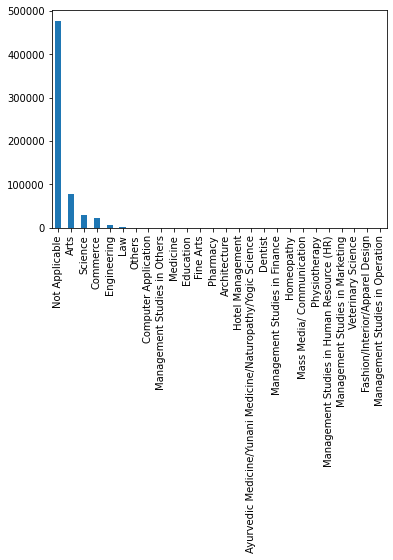

NATURE_OF_OCCUPATION
['White-Collar Professional Employees and Other Employees' 'Student'
 'Support Staff' 'Home Maker' 'NonSchooling Child' 'Wage Labourer'
 'Not Applicable'
 'Small Trader/Hawker/ Businessman without Fixed Premises'
 'White Collar Clerical Employees' 'Small Farmer' 'Organised Farmer'
 'Agricultural Labourer' 'Self Employed Entrepreneur' 'Unoccupied'
 'Retired/Aged' 'Businessman' 'Non-Industrial Technical Employee'
 'Legislator/Social Worker/ Activists'
 'Qualified Self Employed Professionals' 'Home-based Worker'
 'Industrial Workers' 'Manager']


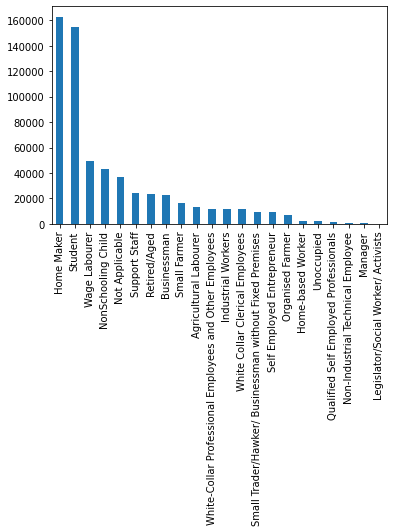

INDUSTRY_OF_OCCUPATION
['Defence Services' 'Not Applicable' 'Education' 'Travel and Tourism'
 'Real Estate & Construction' 'Retail Trade'
 'Public Administrative Services' 'Crop Cultivation'
 'Forestry including Wood Cutting' 'Fruits and Vegetable Farming'
 'Wholesale Trade' 'Health Care'
 'Automobiles and Other Transport Equipment Manufacturers'
 'Personal Professional Services' 'Communication, Post & Courier'
 'Textile Industries' 'Hotels and Restaurants' 'Food Industries'
 'Financial Services' 'Personal Non-Professional Services'
 'Chemical Industries' 'Utilities' 'Metal Industries'
 'Machinery Manufacturers' 'Pharmaceutical Manufacturer'
 'Cement, Tiles, Bricks, Ceramics, Glass and other construction materials'
 'Fishing' 'Media and Publishing' 'IT & ITES'
 'Soaps, Detergents, Cosmetics, Toiletries' 'Mines' 'Gems & Jewellery'
 'Footwear and other Leather Industries' 'Entertainment and Sports'
 'Poultry Farming, Animal Husbandry and Vermiculture']


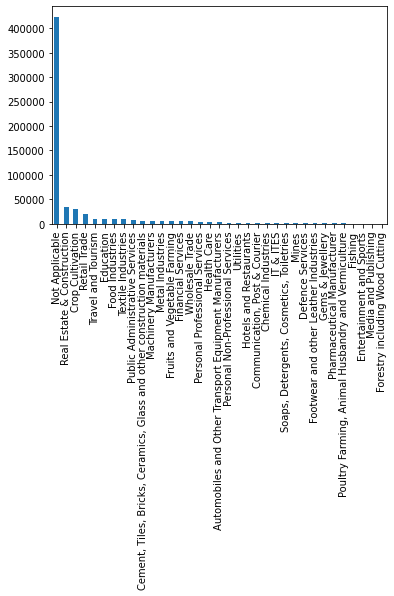

AGE_YRS
[  58   12   24   23   19   20   21   13   10   48   46   11    7   36
   34    4   66   55   26   28    5 -100   63   52   22   27   39   38
    9   51   49   18   15   25   43   17   56   33   73   68   44   29
   30    6   16   14    8   32    2   42   62   57   50   47   84   41
   86   76   70   45   67   54    3   71   37   40   31   35   69   53
    1   59   61   74   75   64   78   77   65   60   88   90   72   82
    0   79   87   85   91   81  109   80   83   89   93   97  107  102
   92  101   95   94   98   99   96  100  106  103  105]


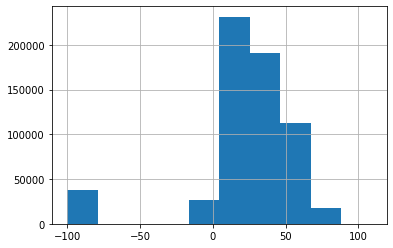

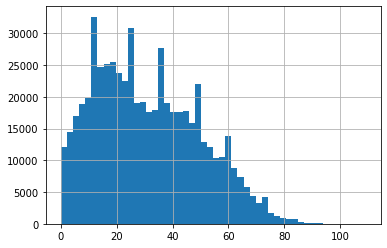

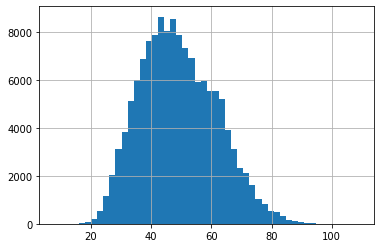

number of unique HH ind 136448
people_of_india_20190901_20191231_R_csv.zip
All data
RELATION_WITH_HOH
['HOH' 'Son' 'Not Applicable' 'Daughter' 'Spouse' 'Data Not Available'
 'Daughter-in-law' 'Grandchild' 'Brother' 'Brother/Sister-in-law' 'Sister'
 'Parent' 'Son-in-law' 'Domestic help' 'Friend' 'Relative'
 'Other non-relatives' 'Inlaw']


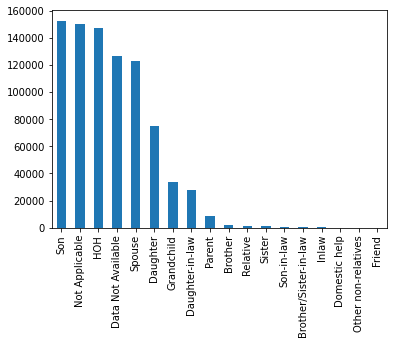

STATE_OF_ORIGIN
['Jammu & Kashmir' 'Not Applicable' 'Data Not Available'
 'Himachal Pradesh' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Uttarakhand'
 'Bihar' 'Haryana' 'Jharkhand' 'Chandigarh' 'Delhi' 'West Bengal'
 'Tamil Nadu' 'Maharashtra' 'Gujarat' 'Assam' 'Andhra Pradesh'
 'Chhattisgarh' 'Madhya Pradesh' 'Odisha' 'Kerala' 'Daman & Diu'
 'Karnataka' 'Mizoram' 'India' 'Sikkim' 'Goa' 'Telangana' 'Nagaland'
 'Puducherry' 'Arunachal Pradesh' 'Meghalaya' 'Foreign' 'Tripura'
 'Manipur']


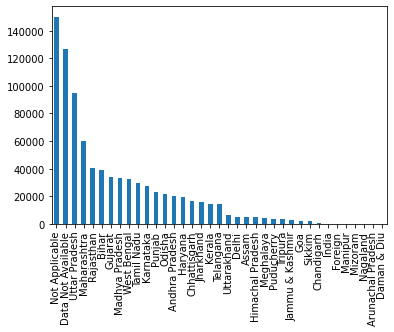

MEMBER_STATUS
['Member of the household' 'Emigrated' 'Dead' 'Family shifted'
 'Unaccounted for and added']


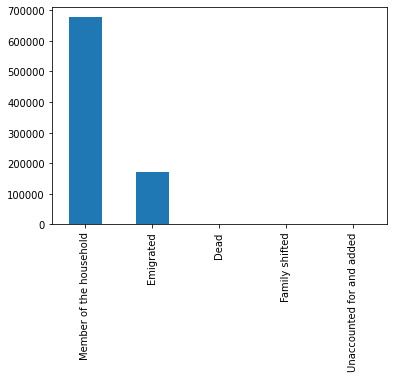

RELIGION
['Muslim' 'Not Applicable' 'Data Not Available' 'Hindu' 'Sikh' 'Christian'
 'Buddhist' 'Jain' 'Religion not stated' 'Other Religion' 'Khasi']


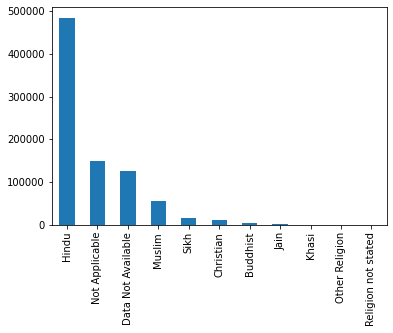

CASTE
['Caste not stated' 'Not Applicable' 'Ashraf (Sayyad Shaikh)' 'Other ST'
 'Gujjar' 'Data Not Available' 'Other OBC (Pasmanda)' 'Vaishya/Bania'
 'Brahmin' 'Rajputs' 'Megh'
 'Weaver and Craftsmen OBC (Bunkar/Darzee/Lohar/Sonar/etc)'
 'Service OBC (Kewat/Nai/Teli/Jogi)' 'Other SC' 'Other OBC'
 'Mughal (Khan)' 'Chama' 'Khatris' 'Other Upper Castes' 'Jat'
 'Arora/Khatri' 'Kurmi' 'Lohar' 'Kori' 'Chamar' 'Julaha'
 'Weaver and Craftsmen OBC (Bunkar/Darzee/Kumhar/Lohar/Sonar/etc)'
 'Kanaura/Kinnara' 'Balmiki' 'Dhobi' 'Yadav' 'Pasi' 'Mazhabi' 'Tharu'
 'Bishnoi' 'Weaver and Craftsmen OBC (Bunkar/Darzee/etc)'
 'Weaver and Craftsmen OBC (Bhavsar/Darzee/Lohar/Prajapati/Sonar/etc)'
 'Khatik'
 'Weavers and Craftsmen OBC  (Gaderia, Chhimbe, Ramgarhia, Ghumia/Parjapat, Lohar, Suniar, Daoli,'
 'Service OBC (Dhobi, Nai, Penja, Bairagi, Labana, Bharbhunja, etc.)'
 'Kamboj' 'Kahar' 'Koli' 'Ad Dharmi' 'Rajputs (Ghosh)' 'Kabirpanthi'
 'Prajapati' 'Adi Dravida' 'Arunthathiyar' 'Mahar' 'Kayastha & Brahma'


KeyboardInterrupt



In [4]:
# df = pd.read_csv('filename.zip', compression='zip', header=0, sep=',', quotechar='"')

for fileNum in [3,17]:
    print(zipFiles[fileNum])
    fileName = people_of_india_datadir+ zipFiles[fileNum]
    df = pd.read_csv(fileName, compression='zip')
    print('All data')
    print('==========')
    
    print('RELATION_WITH_HOH')
    print(pd.unique(df['RELATION_WITH_HOH']))
    df['RELATION_WITH_HOH'].value_counts().plot(kind='bar');
    plt.show()
    print('STATE_OF_ORIGIN')
    print(pd.unique(df['STATE_OF_ORIGIN']))
    df['STATE_OF_ORIGIN'].value_counts().plot(kind='bar');
    plt.show()
    print('MEMBER_STATUS')
    print(pd.unique(df['MEMBER_STATUS']))
    df['MEMBER_STATUS'].value_counts().plot(kind='bar');
    plt.show()
    print('RELIGION')
    print(pd.unique(df['RELIGION']))
    df['RELIGION'].value_counts().plot(kind='bar');
    plt.show()
    print('CASTE')
    print(pd.unique(df['CASTE']))
    df['CASTE'].value_counts().plot(kind='bar');
    plt.show()
    print('CASTE_CATEGORY')
    print(pd.unique(df['CASTE_CATEGORY']))
    df['CASTE_CATEGORY'].value_counts().plot(kind='bar');
    plt.show()
    print('EDUCATION')
    print(pd.unique(df['EDUCATION']))
    df['EDUCATION'].value_counts().plot(kind='bar');
    plt.show()
    print('DISCIPLINE')
    print(pd.unique(df['DISCIPLINE']))
    df['DISCIPLINE'].value_counts().plot(kind='bar');
    plt.show()
    print('NATURE_OF_OCCUPATION')
    print(pd.unique(df['NATURE_OF_OCCUPATION']))
    df['NATURE_OF_OCCUPATION'].value_counts().plot(kind='bar');
    plt.show()
    print('INDUSTRY_OF_OCCUPATION')
    print(pd.unique(df['INDUSTRY_OF_OCCUPATION']))
    df['INDUSTRY_OF_OCCUPATION'].value_counts().plot(kind='bar');
    plt.show()
    print('AGE_YRS')
    print(pd.unique(df['AGE_YRS']))
    df['AGE_YRS'].value_counts().plot(kind='bar');
    plt.show()
    print('number of unique HH ind',df.HH_ID.nunique())
    
    
    print('Known relation to HoH')
    print('==========')
    df_removeNotAvailalbe = df[df['RELATION_WITH_HOH']!='Data Not Available']

    print('RELATION_WITH_HOH')
    print(pd.unique(df_removeNotAvailalbe['RELATION_WITH_HOH']))
    df_removeNotAvailalbe['RELATION_WITH_HOH'].value_counts().plot(kind='bar');
    plt.show()
    print('STATE_OF_ORIGIN')
    print(pd.unique(df_removeNotAvailalbe['STATE_OF_ORIGIN']))
    df_removeNotAvailalbe['STATE_OF_ORIGIN'].value_counts().plot(kind='bar');
    plt.show()
    print('MEMBER_STATUS')
    print(pd.unique(df_removeNotAvailalbe['MEMBER_STATUS']))
    df_removeNotAvailalbe['MEMBER_STATUS'].value_counts().plot(kind='bar');
    plt.show()
    print('RELIGION')
    print(pd.unique(df_removeNotAvailalbe['RELIGION']))
    df_removeNotAvailalbe['RELIGION'].value_counts().plot(kind='bar');
    plt.show()
    print('CASTE')
    print(pd.unique(df_removeNotAvailalbe['CASTE']))
    df_removeNotAvailalbe['CASTE'].value_counts().plot(kind='bar');
    plt.show()
    print('CASTE_CATEGORY')
    print(pd.unique(df_removeNotAvailalbe['CASTE_CATEGORY']))
    df_removeNotAvailalbe['CASTE_CATEGORY'].value_counts().plot(kind='bar');
    plt.show()
    print('EDUCATION')
    print(pd.unique(df_removeNotAvailalbe['EDUCATION']))
    df_removeNotAvailalbe['EDUCATION'].value_counts().plot(kind='bar');
    plt.show()
    print('DISCIPLINE')
    print(pd.unique(df_removeNotAvailalbe['DISCIPLINE']))
    df_removeNotAvailalbe['DISCIPLINE'].value_counts().plot(kind='bar');
    plt.show()
    print('NATURE_OF_OCCUPATION')
    print(pd.unique(df_removeNotAvailalbe['NATURE_OF_OCCUPATION']))
    df_removeNotAvailalbe['NATURE_OF_OCCUPATION'].value_counts().plot(kind='bar');
    plt.show()
    print('INDUSTRY_OF_OCCUPATION')
    print(pd.unique(df_removeNotAvailalbe['INDUSTRY_OF_OCCUPATION']))
    df_removeNotAvailalbe['INDUSTRY_OF_OCCUPATION'].value_counts().plot(kind='bar');
    plt.show()
    print('AGE_YRS')
    print(pd.unique(df_removeNotAvailalbe['AGE_YRS']))
    df_removeNotAvailalbe['AGE_YRS'].hist();
    plt.show()
    df_removeNotAvailalbe[df_removeNotAvailalbe['AGE_YRS']>=0]['AGE_YRS'].hist(bins=50);
    plt.show()
    filt = (df_removeNotAvailalbe['AGE_YRS']>=0) & (df_removeNotAvailalbe['RELATION_WITH_HOH'] == 'HOH')
    df_removeNotAvailalbe[filt]['AGE_YRS'].hist(bins=50);
    plt.show()
    print('number of unique HH ind',df_removeNotAvailalbe.HH_ID.nunique())





In [ ]:
df = 0
df_removeNotAvailalbe = 0 
del df, df_removeNotAvailalbe

# Create Panel Data - Horizontal 

In [ ]:
initalFile = 3 

fileName = people_of_india_datadir+ zipFiles[initalFile]
df = pd.read_csv(fileName, compression='zip')
dropCol = [c for c in df.columns if c.find('WEIGHT')>1]
df.drop(dropCol,inplace=True,axis=1)
    
for f in notebook.tqdm(zipFiles[initalFile+1:18], desc='File', leave=True):
    fileName = people_of_india_datadir+ f
    df_toMerge = pd.read_csv(fileName, compression='zip')
    dropCol = [c for c in df_toMerge.columns if c.find('WEIGHT')>1]
    df_toMerge.drop(dropCol,inplace=True,axis=1)
    
    keep_same = df_toMerge.columns[1:3]
    suffix = f[f.find('_2')+1:f.find('_R')]
    df_toMerge.columns = ['{}{}'.format(c, '' if c in keep_same else suffix) for c in df_toMerge.columns]

    df = df.merge(df_toMerge,on=['HH_ID','MEM_ID'],how='outer')

    
df.to_feather('proc_data\people_of_india_merged.feather')


In [ ]:
#clean
df_toMerge = 0 
del df_toMerge


# Create Data at the HH level

## General Cleaning

I think I would later at the HH level ???

I remove HH where HH are "dropped" or "not accepted". As mentioned in the variable "Reason for non-response : REASON_FOR_NON_RESPONSE":

<em>
"Two relatively smaller instances of non-responses are ’Dropped’ and ’Not accepted’. A household is marked as dropped when interviewers repeatedly report that the household is demolished or destroyed. In such cases the household is marked dropped after due diligence by the supervisor. A household is marked as ’Not accepted’ if the supervisor refuses to accept the data entered by the interviewer after repeated efforts to get clarifications regarding the entries. Dropped and not accepted cases account for about four per cent of the non-responses." 
<\em>
    
see here https://consumerpyramidsdx.cmie.com/kommon/bin/sr.php?kall=wkbquest&id=1011



In [ ]:
# df.REASON_FOR_NON_RESPONSE.unique()
# list_of_columns = [c for c in df.columns if c.find('REASON_FOR_NON_RESPONSE')>-1]
# for c in list_of_columns:
#     print(c)
#     print(df.shape)
#     df = df[df[c]!='Not accepted']
#     df = df[df[c]!='Dropped']
#     print(df.shape)


    


## HH strucutre  
indicate whet her married or not V 
Number of people  V 
number of kids age oh HoH V 
number of kids - age of the youngest, oldest  V 
number of grandparents X 
number of grandaughters X 
married/not married (i.e. there's a spouse)  V 
number of sick in the family  V


number of kids under 18? 

## HoH variables 
HH's age in the age oh HoH 
occupation of HoH,
education of HoH 
religions of HoH
caste of HH 


how much occuaption changes 
how much religion changes 
how much religion changes 

how much people just disapper from HH(?)
how HH change over time in terms of size 
generate a a household panel - 



#### Load data (if needed)


In [6]:
# df = 0 
# del df 

try:
    df
except NameError:
    df = pd.read_feather('proc_data\people_of_india_merged.feather')
else:
    print("It's already in memeory")

#### Create functions for dataGen

In [6]:
def createSummationColumns(df,list_of_columns,colNewName,textToCount,mergeWith=False):
    columnToAggregate = [] 
    for colNum,c in enumerate(list_of_columns):
        #Create Suffix 
        if c.find('201') > -1 :
            suffix = c[c.find('201'):] 
            colName_suffix = colNewName + suffix
        else : 
            colName_suffix = colNewName
        #Create Cols
        columnToAggregate.append(colName_suffix)
        df[colName_suffix] = df[list_of_columns[colNum]] == textToCount

    groupedData = df.groupby('HH_ID')[columnToAggregate].sum().reset_index()
        
    if isinstance(mergeWith, pd.DataFrame):
        mergeWith=  mergeWith.merge(groupedData,on='HH_ID',how="left",validate="1:1")
        return mergeWith, columnToAggregate
    else :
        return groupedData, columnToAggregate
    

def ageCriteria(df,list_of_columns,colNewName,ageMax,mergeWith=False):
    columnToAggregate = [] 
    for colNum,c in enumerate(list_of_columns):
        #Create Suffix 
        if c.find('201') > -1 :
            suffix = c[c.find('201'):] 
            colName_suffix = colNewName + suffix
        else : 
            colName_suffix = colNewName
        #Create Cols
        columnToAggregate.append(colName_suffix)
        df[colName_suffix] = (df[list_of_columns[colNum]] <= ageMax) & (df[list_of_columns[colNum]] >= 0)

    groupedData = df.groupby('HH_ID')[columnToAggregate].sum().reset_index()
#     df = df.drop(columnToAggregate,axis=1)
    
    if isinstance(mergeWith, pd.DataFrame):
        mergeWith=  mergeWith.merge(groupedData,on='HH_ID',how="left",validate="1:1")
        return mergeWith, columnToAggregate
    else :
        return groupedData, columnToAggregate
    

# Create data 

Notes:
- THere are cases in which a house is not found for one period but it is found in the following period 
- Sometimes when a hosue is not found they still define the HH members, but the HoH and any other information is not provided. It is provided in followinf years. A possibility is to use it.

###### Create number of HH members 

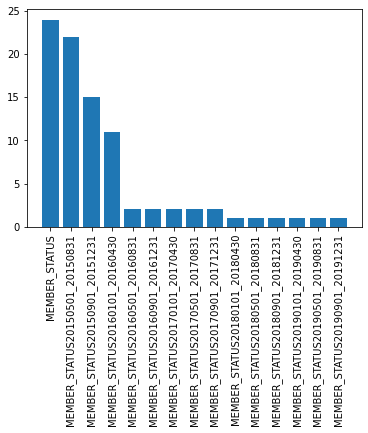

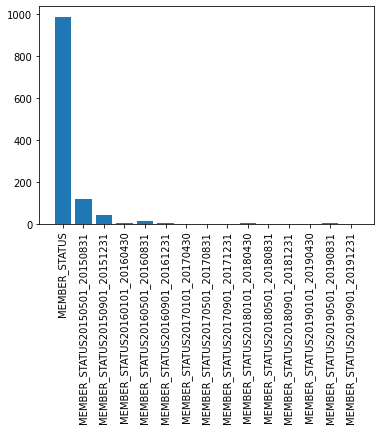

In [6]:
#Create Number of HH members 
#Checking the data 
list_of_columns = [c for c in df.columns if c.find("MEMBER_STATUS")>-1]
label = []
addedValues = []
deletedValues = []
for c in list_of_columns:
    label.append(c)
    addedValues.append(df[df[c]=='Unaccounted for and added'].shape[0])
    deletedValues.append(df[df[c]=='Unaccounted for and deleted'].shape[0])

plt.bar(label,addedValues)
plt.xticks(rotation=90)
plt.show()

plt.bar(label,deletedValues)
plt.xticks(rotation=90)
plt.show()

HH_panel,HHcols = createSummationColumns(df,list_of_columns,"HH_members",textToCount="Member of the household",mergeWith=False)


###### Create number of sons/daugters/kids/grandparents/grandchildren


In [7]:
list_of_columns = [c for c in df.columns if c.find("RELATION_WITH_HOH")>-1]
HH_panel,sonsCol = createSummationColumns(df,list_of_columns,"sons",textToCount="Son",mergeWith=HH_panel)
HH_panel,daugterCol = createSummationColumns(df,list_of_columns,"daugters",textToCount="Daughter",mergeWith=HH_panel)
HH_panel,parentsCol = createSummationColumns(df,list_of_columns,"parents",textToCount="Parent",mergeWith=HH_panel)
HH_panel,HoHCol = createSummationColumns(df,list_of_columns,"hoh",textToCount="HOH",mergeWith=HH_panel)
HH_panel,spouseCol = createSummationColumns(df,list_of_columns,"livingWSpouse",textToCount="Spouse",mergeWith=HH_panel)

#Create others
for i in range(len(HHcols)):
    c = HHcols[i]
    if c.find('201') > -1 :
        suffix = c[c.find('201'):] 
        colName = "others_" + suffix
    else : 
        colName = "others_" 
    
    HH_panel[colName] = HH_panel[HHcols[i]] - HH_panel[sonsCol[i]] - HH_panel[daugterCol[i]] - HH_panel[parentsCol[i]]  - HH_panel[spouseCol[i]] - HH_panel[HoHCol[i]]
    
    

##### Add is healthy 

In [8]:
list_of_columns = [c for c in df.columns if c.find("IS_HEALTHY")>-1]
HH_panel,isHealth = createSummationColumns(df,list_of_columns,"not_healthy",textToCount="N",mergeWith=HH_panel)


#### number of hh memebers below age 18 

In [9]:
list_of_columns = [c for c in df.columns if c.find("AGE_YRS")>-1]
HH_panel,under18 = ageCriteria(df,list_of_columns,'under18',ageMax=18,mergeWith=HH_panel)


**Note**: Abit of cleaning the df file. Notice that this is much faster than using drop - and also more memory efficient. I think

In [10]:
list(df.columns).index('HH_members')
for c in notebook.tqdm(df.columns[727:]):
    del df[c]

  0%|          | 0/120 [00:00<?, ?it/s]

## Variables at the HH level 

##### Reason for no response

In [11]:
list_of_columns = [c for c in df.columns if c.find('REASON_FOR_NON_RESPONSE')>-1]
rfndf = df.groupby('HH_ID')[list_of_columns].first().reset_index()
HH_panel = HH_panel.merge(rfndf, on="HH_ID",how="left",validate='1:1')

##### State/region 
HH is a physical location, therefore state and region does not change overtime, see for example, here 
https://consumerpyramidsdx.cmie.com/kommon/bin/sr.php?kall=wkbquest&id=1683.
Therefore I just keep the first state. 
I do need to keep track of "FAMILY_SHIFTED" to track if there were any changes. 


In [12]:
HH_panel_backup = HH_panel.copy()

In [13]:
for cc in ['HR', 'DISTRICT','REGION_TYPE']:
    list_of_columns = [c for c in df.columns if c.find(cc)>-1]
    rfndf = df.groupby('HH_ID')[list_of_columns].first().reset_index()
    for c in list_of_columns:
        rfndf[list_of_columns[0]] = np.where(rfndf[c].isnull(),rfndf[list_of_columns[0]],rfndf[c])
    rfndf = rfndf[['HH_ID',list_of_columns[0]]]
    HH_panel = HH_panel.merge(rfndf, on="HH_ID",how="left",validate='1:1')

#State 
list_of_columns = [c for c in df.columns if c.find('STATE')>-1 & c.find('STATE_OF_ORIGIN')==-1 
                   & c.find('MEM_NON_RESPONSE_FOR_STATE_W')==-1 & c.find('GE15_MEM_NON_RESPONSE_FOR_STATE_W')==-1 ]
rfndf = df.groupby('HH_ID')[list_of_columns].first().reset_index()
for c in list_of_columns:
    rfndf[list_of_columns[0]] = np.where(rfndf[c].isnull(),rfndf[list_of_columns[0]],rfndf[c])
rfndf = rfndf[['HH_ID',list_of_columns[0]]]
HH_panel = HH_panel.merge(rfndf, on="HH_ID",how="left",validate='1:1')


## Add variables at the HoH level

In [25]:
hhvars = ['RELIGION', 'CASTE', 'CASTE_CATEGORY', 'LITERACY', 'EDUCATION', 'DISCIPLINE', 'NATURE_OF_OCCUPATION', 'INDUSTRY_OF_OCCUPATION','AGE_YRS','AGE_MTHS','GENDER']
list_of_columns_HH = [c for c in df.columns if c.find("RELATION_WITH_HOH")>-1]

for var in notebook.tqdm(hhvars):
    list_of_columns_var = [c for c in df.columns if c.find(var)>-1]
    for cv,chh in zip(list_of_columns_var,list_of_columns_HH):
        HHdf = df[df['RELATION_WITH_HOH'] == "HOH"]
        HHdf = HHdf[['HH_ID',cv]]
        HH_panel = HH_panel.merge(HHdf, on="HH_ID",how="left",validate='1:1')

del HHdf



  0%|          | 0/11 [00:00<?, ?it/s]

### Finishing up! and savign the HH panel

In [26]:
HH_panel.to_feather('proc_data\HH_Panel.feather')


# Checks

In [3]:
HH_panel = pd.read_feather('proc_data\HH_Panel.feather')


### Checking response rate

In [22]:
for  c in HH_panel.columns:
    print(c)

HH_ID
HH_members
HH_members20150501_20150831
HH_members20150901_20151231
HH_members20160101_20160430
HH_members20160501_20160831
HH_members20160901_20161231
HH_members20170101_20170430
HH_members20170501_20170831
HH_members20170901_20171231
HH_members20180101_20180430
HH_members20180501_20180831
HH_members20180901_20181231
HH_members20190101_20190430
HH_members20190501_20190831
HH_members20190901_20191231
sons
sons20150501_20150831
sons20150901_20151231
sons20160101_20160430
sons20160501_20160831
sons20160901_20161231
sons20170101_20170430
sons20170501_20170831
sons20170901_20171231
sons20180101_20180430
sons20180501_20180831
sons20180901_20181231
sons20190101_20190430
sons20190501_20190831
sons20190901_20191231
daugters
daugters20150501_20150831
daugters20150901_20151231
daugters20160101_20160430
daugters20160501_20160831
daugters20160901_20161231
daugters20170101_20170430
daugters20170501_20170831
daugters20170901_20171231
daugters20180101_20180430
daugters20180501_20180831
daugters2

In [23]:

list_of_columns = [c for c in HH_panel.columns if c.find("REASON_FOR_NON_RESPONSE")>-1]
testHHPanel = HH_panel.copy()
testHHPanel['answers'] = 0 
print(testHHPanel.shape)
for ci,c in enumerate(list_of_columns):
    print(c)
    testHHPanel['answers'] = testHHPanel['answers'] + (testHHPanel[c]=='No Failure').astype(int)
    print(np.sum(testHHPanel['answers']==ci+1))

testHHPanel[testHHPanel['answers']>=12].shape

(207910, 377)
REASON_FOR_NON_RESPONSE
136448
REASON_FOR_NON_RESPONSE20150501_20150831
112437
REASON_FOR_NON_RESPONSE20150901_20151231
99524
REASON_FOR_NON_RESPONSE20160101_20160430
87931
REASON_FOR_NON_RESPONSE20160501_20160831
77290
REASON_FOR_NON_RESPONSE20160901_20161231
69213
REASON_FOR_NON_RESPONSE20170101_20170430
63527
REASON_FOR_NON_RESPONSE20170501_20170831
57773
REASON_FOR_NON_RESPONSE20170901_20171231
50050
REASON_FOR_NON_RESPONSE20180101_20180430
45671
REASON_FOR_NON_RESPONSE20180501_20180831
42434
REASON_FOR_NON_RESPONSE20180901_20181231
38792
REASON_FOR_NON_RESPONSE20190101_20190430
35323
REASON_FOR_NON_RESPONSE20190501_20190831
32569
REASON_FOR_NON_RESPONSE20190901_20191231
30232


(115200, 377)

<AxesSubplot:>

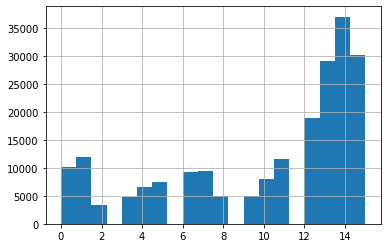

In [24]:
testHHPanel['answers'].hist(bins=20)

In [19]:
testHHPanel[testHHPanel['answers']>=12]

,HH_ID,HH_members,HH_members20150501_20150831,HH_members20150901_20151231,HH_members20160101_20160430,HH_members20160501_20160831,HH_members20160901_20161231,HH_members20170101_20170430,HH_members20170501_20170831,HH_members20170901_20171231,HH_members20180101_20180430,HH_members20180501_20180831,HH_members20180901_20181231,HH_members20190101_20190430,HH_members20190501_20190831,HH_members20190901_20191231,sons,sons20150501_20150831,sons20150901_20151231,sons20160101_20160430,sons20160501_20160831,sons20160901_20161231,sons20170101_20170430,sons20170501_20170831,sons20170901_20171231,sons20180101_20180430,sons20180501_20180831,sons20180901_20181231,sons20190101_20190430,sons20190501_20190831,sons20190901_20191231,daugters,daugters20150501_20150831,daugters20150901_20151231,daugters20160101_20160430,daugters20160501_20160831,daugters20160901_20161231,daugters20170101_20170430,daugters20170501_20170831,daugters20170901_20171231,daugters20180101_20180430,daugters20180501_20180831,daugters20180901_20181231,daugters20190101_20190430,daugters20190501_20190831,daugters20190901_20191231,parents,parents20150501_20150831,parents20150901_20151231,parents20160101_20160430,parents20160501_20160831,parents20160901_20161231,parents20170101_20170430,parents20170501_20170831,parents20170901_20171231,parents20180101_20180430,parents20180501_20180831,parents20180901_20181231,parents20190101_20190430,parents20190501_20190831,parents20190901_20191231,hoh,hoh20150501_20150831,hoh20150901_20151231,hoh20160101_20160430,hoh20160501_20160831,hoh20160901_20161231,hoh20170101_20170430,hoh20170501_20170831,hoh20170901_20171231,hoh20180101_20180430,hoh20180501_20180831,hoh20180901_20181231,hoh20190101_20190430,hoh20190501_20190831,hoh20190901_20191231,livingWSpouse,livingWSpouse20150501_20150831,livingWSpouse20150901_20151231,livingWSpouse20160101_20160430,livingWSpouse20160501_20160831,livingWSpouse20160901_20161231,livingWSpouse20170101_20170430,livingWSpouse20170501_20170831,livingWSpouse20170901_20171231,livingWSpouse20180101_20180430,livingWSpouse20180501_20180831,livingWSpouse20180901_20181231,livingWSpouse20190101_20190430,livingWSpouse20190501_20190831,livingWSpouse20190901_20191231,others_,others_20150501_20150831,others_20150901_20151231,others_20160101_20160430,others_20160501_20160831,others_20160901_20161231,others_20170101_20170430,others_20170501_20170831,others_20170901_20171231,others_20180101_20180430,others_20180501_20180831,others_20180901_20181231,others_20190101_20190430,others_20190501_20190831,others_20190901_20191231,not_healthy,not_healthy20150501_20150831,not_healthy20150901_20151231,not_healthy20160101_20160430,not_healthy20160501_20160831,not_healthy20160901_20161231,not_healthy20170101_20170430,not_healthy20170501_20170831,not_healthy20170901_20171231,not_healthy20180101_20180430,not_healthy20180501_20180831,not_healthy20180901_20181231,not_healthy20190101_20190430,not_healthy20190501_20190831,not_healthy20190901_20191231,under18,under1820150501_20150831,under1820150901_20151231,under1820160101_20160430,under1820160501_20160831,under1820160901_20161231,under1820170101_20170430,under1820170501_20170831,under1820170901_20171231,under1820180101_20180430,under1820180501_20180831,under1820180901_20181231,under1820190101_20190430,under1820190501_20190831,under1820190901_20191231,REASON_FOR_NON_RESPONSE,REASON_FOR_NON_RESPONSE20150501_20150831,REASON_FOR_NON_RESPONSE20150901_20151231,REASON_FOR_NON_RESPONSE20160101_20160430,REASON_FOR_NON_RESPONSE20160501_20160831,REASON_FOR_NON_RESPONSE20160901_20161231,REASON_FOR_NON_RESPONSE20170101_20170430,REASON_FOR_NON_RESPONSE20170501_20170831,REASON_FOR_NON_RESPONSE20170901_20171231,REASON_FOR_NON_RESPONSE20180101_20180430,REASON_FOR_NON_RESPONSE20180501_20180831,REASON_FOR_NON_RESPONSE20180901_20181231,REASON_FOR_NON_RESPONSE20190101_20190430,REASON_FOR_NON_RESPONSE20190501_20190831,REASON_FOR_NON_RESPONSE20190901_20191231,HR,HR20150501_20150831,HR20150901_20151231,HR20160101_20160430,HR201

## Checking age

In [101]:
list_of_columns_HH = [c for c in df.columns if c.find("RELATION_WITH_HOH")>-1]
list_of_columns_age = [c for c in df.columns if c.find('AGE_YRS')>-1]

totallist = []
for v in zip(list_of_columns_HH,  list_of_columns_age):
    totallist.extend([v[0],v[1]]) 


In [39]:
df[df['HH_ID']==99998682][['HH_ID','PSU_ID','REGION_TYPE']+totallist]


,HH_ID,PSU_ID,REGION_TYPE,RELATION_WITH_HOH,AGE_YRS,RELATION_WITH_HOH20150501_20150831,AGE_YRS20150501_20150831,RELATION_WITH_HOH20150901_20151231,AGE_YRS20150901_20151231,RELATION_WITH_HOH20160101_20160430,AGE_YRS20160101_20160430,RELATION_WITH_HOH20160501_20160831,AGE_YRS20160501_20160831,RELATION_WITH_HOH20160901_20161231,AGE_YRS20160901_20161231,RELATION_WITH_HOH20170101_20170430,AGE_YRS20170101_20170430,RELATION_WITH_HOH20170501_20170831,AGE_YRS20170501_20170831,RELATION_WITH_HOH20170901_20171231,AGE_YRS20170901_20171231,RELATION_WITH_HOH20180101_20180430,AGE_YRS20180101_20180430,RELATION_WITH_HOH20180501_20180831,AGE_YRS20180501_20180831,RELATION_WITH_HOH20180901_20181231,AGE_YRS20180901_20181231,RELATION_WITH_HOH20190101_20190430,AGE_YRS20190101_20190430,RELATION_WITH_HOH20190501_20190831,AGE_YRS20190501_20190831,RELATION_WITH_HOH20190901_20191231,AGE_YRS20190901_20191231
148977,99998682,PSU_ID_1169,URBAN,HOH,42.0,HOH,42.0,HOH,42.0,HOH,42.0,HOH,43.0,HOH,43.0,HOH,41.0,HOH,40.0,Not Applicable,-100.0,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
148978,99998682,PSU_ID_1169,URBAN,Spouse,37.0,Spouse,38.0,Spouse,38.0,Spouse,38.0,Spouse,39.0,Spouse,38.0,Spouse,36.0,Spouse,35.0,HOH,35.0,HOH,37.0,HOH,38.0,HOH,40.0,HOH,40.0,HOH,40.0,Not Applicable,-100.0
148979,99998682,PSU_ID_1169,URBAN,Son,3.0,Son,4.0,Son,4.0,Son,4.0,Son,5.0,Son,5.0,Son,7.0,Son,7.0,Son,8.0,Son,10.0,Son,12.0,Son,12.0,Son,12.0,Son,11.0,Not Applicable,-100.0
1057985,99998682,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,HOH,35.0
1057986,99998682,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,Son,15.0


In [ ]:
# identify changes in HoH
# find age skips - what the share of people with age years skip 

In [5]:
list_of_columns_age = [c for c in df.columns if c.find('AGE_YRS')>-1]

df['numSkips'] = 0 
for ci,c in enumerate(list_of_columns_age):
    df['numSkips'] = df['numSkips'] + 
    (((df[c] - df[list_of_columns_age[ci-1]])>1) + ((df[c] - df[list_of_columns_age[ci-1]])<0))*(df[c]!=-100)*(df[list_of_columns_age[ci-1]]!=-100)


In [7]:
df[df['numSkips']>0]

,WAVE_NO,HH_ID,MEM_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,RESPONSE_STATUS,REASON_FOR_NON_RESPONSE,MEM_NON_RESPONSE_W,MEM_NON_RESPONSE_FOR_COUNTRY_W,MEM_NON_RESPONSE_FOR_STATE_W,GE15_MEM_NON_RESPONSE_W,GE15_MEM_NON_RESPONSE_FOR_COUNTRY_W,GE15_MEM_NON_RESPONSE_FOR_STATE_W,MEMBER_STATUS,GENDER,AGE_YRS,AGE_MTHS,RELATION_WITH_HOH,STATE_OF_ORIGIN,RELIGION,CASTE,CASTE_CATEGORY,LITERACY,EDUCATION,DISCIPLINE,NATURE_OF_OCCUPATION,INDUSTRY_OF_OCCUPATION,IS_HEALTHY,IS_ON_REGULAR_MEDICATION,IS_HOSPITALISED,HAS_BANK_AC,HAS_CREDITCARD,HAS_KISAN_CREDITCARD,HAS_DEMAT_AC,HAS_PF_AC,HAS_LIC,HAS_HEALTH_INSURANCE,HAS_MOBILE,WAVE_NO20150501_20150831,STATE20150501_20150831,HR20150501_20150831,DISTRICT20150501_20150831,REGION_TYPE20150501_20150831,STRATUM20150501_20150831,PSU_ID20150501_20150831,MONTH_SLOT20150501_20150831,RESPONSE_STATUS20150501_20150831,REASON_FOR_NON_RESPONSE20150501_20150831,MEM_NON_RESPONSE_W20150501_20150831,MEM_NON_RESPONSE_FOR_COUNTRY_W20150501_20150831,MEM_NON_RESPONSE_FOR_STATE_W20150501_20150831,GE15_MEM_NON_RESPONSE_W20150501_20150831,GE15_MEM_NON_RESPONSE_FOR_COUNTRY_W20150501_20150831,GE15_MEM_NON_RESPONSE_FOR_STATE_W20150501_20150831,MEMBER_STATUS20150501_20150831,GENDER20150501_20150831,AGE_YRS20150501_20150831,AGE_MTHS20150501_20150831,RELATION_WITH_HOH20150501_20150831,STATE_OF_ORIGIN20150501_20150831,RELIGION20150501_20150831,CASTE20150501_20150831,CASTE_CATEGORY20150501_20150831,LITERACY20150501_20150831,EDUCATION20150501_20150831,DISCIPLINE20150501_20150831,NATURE_OF_OCCUPATION20150501_20150831,INDUSTRY_OF_OCCUPATION20150501_20150831,IS_HEALTHY20150501_20150831,IS_ON_REGULAR_MEDICATION20150501_20150831,IS_HOSPITALISED20150501_20150831,HAS_BANK_AC20150501_20150831,HAS_CREDITCARD20150501_20150831,HAS_KISAN_CREDITCARD20150501_20150831,HAS_DEMAT_AC20150501_20150831,HAS_PF_AC20150501_20150831,HAS_LIC20150501_20150831,HAS_HEALTH_INSURANCE20150501_20150831,HAS_MOBILE20150501_20150831,WAVE_NO20150901_20151231,STATE20150901_20151231,HR20150901_20151231,DISTRICT20150901_20151231,REGION_TYPE20150901_20151231,STRATUM20150901_20151231,PSU_ID20150901_20151231,MONTH_SLOT20150901_20151231,RESPONSE_STATUS20150901_20151231,REASON_FOR_NON_RESPONSE20150901_20151231,MEM_NON_RESPONSE_W20150901_20151231,MEM_NON_RESPONSE_FOR_COUNTRY_W20150901_20151231,MEM_NON_RESPONSE_FOR_STATE_W20150901_20151231,GE15_MEM_NON_RESPONSE_W20150901_20151231,GE15_MEM_NON_RESPONSE_FOR_COUNTRY_W20150901_20151231,GE15_MEM_NON_RESPONSE_FOR_STATE_W20150901_20151231,MEMBER_STATUS20150901_20151231,GENDER20150901_20151231,AGE_YRS20150901_20151231,AGE_MTHS20150901_20151231,RELATION_WITH_HOH20150901_20151231,STATE_OF_ORIGIN20150901_20151231,RELIGION20150901_20151231,CASTE20150901_20151231,CASTE_CATEGORY20150901_20151231,LITERACY20150901_20151231,EDUCATION20150901_20151231,DISCIPLINE20150901_20151231,NATURE_OF_OCCUPATION20150901_20151231,INDUSTRY_OF_OCCUPATION20150901_20151231,IS_HEALTHY20150901_20151231,IS_ON_REGULAR_MEDICATION20150901_20151231,IS_HOSPITALISED20150901_20151231,HAS_BANK_AC20150901_20151231,HAS_CREDITCARD20150901_20151231,HAS_KISAN_CREDITCARD20150901_20151231,HAS_DEMAT_AC20150901_20151231,HAS_PF_AC20150901_20151231,HAS_LIC20150901_20151231,HAS_HEALTH_INSURANCE20150901_20151231,HAS_MOBILE20150901_20151231,WAVE_NO20160101_20160430,STATE20160101_20160430,HR20160101_20160430,DISTRICT20160101_20160430,REGION_TYPE20160101_20160430,STRATUM20160101_20160430,PSU_ID20160101_20160430,MONTH_SLOT20160101_20160430,RESPONSE_STATUS20160101_20160430,REASON_FOR_NON_RESPONSE20160101_20160430,MEM_NON_RESPONSE_W20160101_20160430,MEM_NON_RESPONSE_FOR_COUNTRY_W20160101_20160430,MEM_NON_RESPONSE_FOR_STATE_W20160101_20160430,GE15_MEM_NON_RESPONSE_W20160101_20160430,GE15_MEM_NON_RESPONSE_FOR_COUNTRY_W20160101_20160430,GE15_MEM_NON_RESPONSE_FOR_STATE_W20160101_20160430,MEMBER_STATUS20160101_20160430,GENDER20160101_20160430,AGE_YRS20160101_20160430,AGE_MTHS20160101_20160430,RELATION_WITH_HOH20160101_20160430,STATE_OF_ORIGIN20160101_20160430,RELIGION20160101_2016

In [8]:
list_of_columns_HH = [c for c in df.columns if c.find("RELATION_WITH_HOH")>-1]
list_of_columns_age = [c for c in df.columns if c.find('AGE_YRS')>-1]

totallist = []
for v in zip(list_of_columns_HH,  list_of_columns_age):
    totallist.extend([v[0],v[1]]) 
    
    
df[df['numSkips']>0][['HH_ID','PSU_ID','REGION_TYPE','numSkips']+totallist]


,HH_ID,PSU_ID,REGION_TYPE,numSkips,RELATION_WITH_HOH,AGE_YRS,RELATION_WITH_HOH20150501_20150831,AGE_YRS20150501_20150831,RELATION_WITH_HOH20150901_20151231,AGE_YRS20150901_20151231,RELATION_WITH_HOH20160101_20160430,AGE_YRS20160101_20160430,RELATION_WITH_HOH20160501_20160831,AGE_YRS20160501_20160831,RELATION_WITH_HOH20160901_20161231,AGE_YRS20160901_20161231,RELATION_WITH_HOH20170101_20170430,AGE_YRS20170101_20170430,RELATION_WITH_HOH20170501_20170831,AGE_YRS20170501_20170831,RELATION_WITH_HOH20170901_20171231,AGE_YRS20170901_20171231,RELATION_WITH_HOH20180101_20180430,AGE_YRS20180101_20180430,RELATION_WITH_HOH20180501_20180831,AGE_YRS20180501_20180831,RELATION_WITH_HOH20180901_20181231,AGE_YRS20180901_20181231,RELATION_WITH_HOH20190101_20190430,AGE_YRS20190101_20190430,RELATION_WITH_HOH20190501_20190831,AGE_YRS20190501_20190831,RELATION_WITH_HOH20190901_20191231,AGE_YRS20190901_20191231
0,77051739,PSU_ID_7959,RURAL,7,HOH,58.0,HOH,58.0,HOH,58.0,HOH,59.0,HOH,59.0,Data Not Available,59.0,Data Not Available,59.0,Data Not Available,59.0,HOH,61.0,HOH,58.0,HOH,60.0,HOH,58.0,HOH,60.0,HOH,61.0,HOH,66.0
1,77051739,PSU_ID_7959,RURAL,4,Son,12.0,Son,12.0,Son,13.0,Son,13.0,Son,13.0,Data Not Available,13.0,Data Not Available,13.0,Data Not Available,13.0,Son,14.0,Son,16.0,Son,17.0,Son,18.0,Son,20.0,Son,22.0,Son,23.0
2,77051739,PSU_ID_7959,RURAL,3,Daughter,24.0,Daughter,24.0,Daughter,25.0,Daughter,25.0,Daughter,25.0,Data Not Available,25.0,Data Not Available,25.0,Data Not Available,25.0,Daughter,25.0,Daughter,24.0,Daughter,25.0,Daughter,24.0,Daughter,26.0,Not Applicable,-100.0,Not Applicable,-100.0
3,77051739,PSU_ID_7959,RURAL,3,Daughter,23.0,Daughter,23.0,Daughter,23.0,Daughter,24.0,Daughter,24.0,Data Not Available,24.0,Data Not Available,24.0,Data Not Available,24.0,Daughter,23.0,Daughter,23.0,Daughter,24.0,Daughter,23.0,Daughter,25.0,Not Applicable,-100.0,Not Applicable,-100.0
4,77051739,PSU_ID_7959,RURAL,5,Daughter,19.0,Daughter,19.0,Daughter,19.0,Daughter,20.0,Daughter,20.0,Data Not Available,20.0,Data Not Available,20.0,Data Not Available,20.0,Daughter,21.0,Daughter,20.0,Daughter,22.0,Daughter,22.0,Daughter,24.0,Daughter,26.0,Daughter,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056793,12430465,None,None,1,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,Grandchild,0.0,Grandchild,5.0
1056795,54588468,None,None,1,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,Brother/Sister-in-law,4.0,Brother/Sister-in-law,6.0
1056797,82505234,None,None,1,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,Son-in-law,27.0,Son-in-law,26.0
1056798,14641405,None,None,1,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,Grandchild,0.0,Grandchild,6.0


In [9]:
a = df[df['numSkips']>0][['HH_ID','PSU_ID','REGION_TYPE','numSkips']+totallist]


In [10]:
a.head(60)

,HH_ID,PSU_ID,REGION_TYPE,numSkips,RELATION_WITH_HOH,AGE_YRS,RELATION_WITH_HOH20150501_20150831,AGE_YRS20150501_20150831,RELATION_WITH_HOH20150901_20151231,AGE_YRS20150901_20151231,RELATION_WITH_HOH20160101_20160430,AGE_YRS20160101_20160430,RELATION_WITH_HOH20160501_20160831,AGE_YRS20160501_20160831,RELATION_WITH_HOH20160901_20161231,AGE_YRS20160901_20161231,RELATION_WITH_HOH20170101_20170430,AGE_YRS20170101_20170430,RELATION_WITH_HOH20170501_20170831,AGE_YRS20170501_20170831,RELATION_WITH_HOH20170901_20171231,AGE_YRS20170901_20171231,RELATION_WITH_HOH20180101_20180430,AGE_YRS20180101_20180430,RELATION_WITH_HOH20180501_20180831,AGE_YRS20180501_20180831,RELATION_WITH_HOH20180901_20181231,AGE_YRS20180901_20181231,RELATION_WITH_HOH20190101_20190430,AGE_YRS20190101_20190430,RELATION_WITH_HOH20190501_20190831,AGE_YRS20190501_20190831,RELATION_WITH_HOH20190901_20191231,AGE_YRS20190901_20191231
0,77051739,PSU_ID_7959,RURAL,7,HOH,58.0,HOH,58.0,HOH,58.0,HOH,59.0,HOH,59.0,Data Not Available,59.0,Data Not Available,59.0,Data Not Available,59.0,HOH,61.0,HOH,58.0,HOH,60.0,HOH,58.0,HOH,60.0,HOH,61.0,HOH,66.0
1,77051739,PSU_ID_7959,RURAL,4,Son,12.0,Son,12.0,Son,13.0,Son,13.0,Son,13.0,Data Not Available,13.0,Data Not Available,13.0,Data Not Available,13.0,Son,14.0,Son,16.0,Son,17.0,Son,18.0,Son,20.0,Son,22.0,Son,23.0
2,77051739,PSU_ID_7959,RURAL,3,Daughter,24.0,Daughter,24.0,Daughter,25.0,Daughter,25.0,Daughter,25.0,Data Not Available,25.0,Data Not Available,25.0,Data Not Available,25.0,Daughter,25.0,Daughter,24.0,Daughter,25.0,Daughter,24.0,Daughter,26.0,Not Applicable,-100.0,Not Applicable,-100.0
3,77051739,PSU_ID_7959,RURAL,3,Daughter,23.0,Daughter,23.0,Daughter,23.0,Daughter,24.0,Daughter,24.0,Data Not Available,24.0,Data Not Available,24.0,Data Not Available,24.0,Daughter,23.0,Daughter,23.0,Daughter,24.0,Daughter,23.0,Daughter,25.0,Not Applicable,-100.0,Not Applicable,-100.0
4,77051739,PSU_ID_7959,RURAL,5,Daughter,19.0,Daughter,19.0,Daughter,19.0,Daughter,20.0,Daughter,20.0,Data Not Available,20.0,Data Not Available,20.0,Data Not Available,20.0,Daughter,21.0,Daughter,20.0,Daughter,22.0,Daughter,22.0,Daughter,24.0,Daughter,26.0,Daughter,27.0
5,77051739,PSU_ID_7959,RURAL,6,Daughter,20.0,Daughter,20.0,Daughter,20.0,Daughter,21.0,Daughter,21.0,Data Not Available,21.0,Data Not Available,21.0,Data Not Available,21.0,Daughter,20.0,Daughter,18.0,Daughter,20.0,Daughter,20.0,Daughter,22.0,Daughter,24.0,Daughter,25.0
6,77051739,PSU_ID_7959,RURAL,5,Daughter,21.0,Daughter,21.0,Daughter,22.0,Daughter,22.0,Daughter,22.0,Data Not Available,22.0,Data Not Available,22.0,Data Not Available,22.0,Daughter,22.0,Daughter,22.0,Daughter,21.0,Daughter,19.0,Daughter,21.0,Daughter,23.0,Daughter,24.0
7,77051739,PSU_ID_7959,RURAL,6,Daughter,13.0,Daughter,13.0,Daughter,14.0,Daughter,14.0,Daughter,14.0,Data Not Available,14.0,Data Not Available,14.0,Data Not Available,14.0,Daughter,15.0,Daughter,17.0,Daughter,18.0,Daughter,16.0,Daughter,18.0,Daughter,20.0,Daughter,18.0
8,77051739,PSU_ID_7959,RURAL,6,Son,10.0,Son,10.0,Son,10.0,Son,10.0,Son,11.0,Data Not Available,11.0,Data Not Available,11.0,Data Not Available,11.0,Son,12.0,Son,14.0,Son,15.0,Son,14.0,Son,16.0,Son,18.0,Son,17.0
9,61287374,PSU_ID_7959,RURAL,7,HOH,48.0,HOH,48.0,HOH,49.0,HOH,49.0,HOH,49.0,Data Not Available,49.0,Data Not Available,49.0,HOH,53.0,HOH,55.0,HOH,54.0,HOH,55.0,HOH,56.0,HOH,55.0,HOH,57.0,HOH,55.0


<AxesSubplot:>

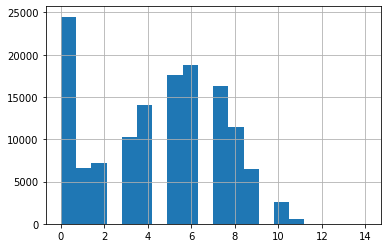

In [97]:
a = df[df['RELATION_WITH_HOH']=="HOH"]
# a = df.groupby("HH_ID")['numSkips'].max().reset_index()
a['numSkips'].hist(bins=20)
# .hist(bins=20)

In [83]:
dftest = pd.DataFrame()
dftest['old'] = df[c]
dftest['young'] = df[list_of_columns_age[ci-1]]
dftest['diff'] = ((df[c] - df[list_of_columns_age[ci-1]]>1) + (df[c] - df[list_of_columns_age[ci-1]]<0))*(df[c]!=-100)*(df[list_of_columns_age[ci-1]]!=-100)
dftest

,old,young,diff
0,66.0,61.0,True
1,23.0,22.0,False
2,-100.0,-100.0,False
3,-100.0,-100.0,False
4,27.0,26.0,False
...,...,...,...
1063931,5.0,NaN,False
1063932,3.0,NaN,False
1063933,0.0,NaN,False
1063934,1.0,NaN,False


In [84]:
dftest[dftest['diff']==True]

,old,young,diff
0,66.0,61.0,True
7,18.0,20.0,True
8,17.0,18.0,True
9,55.0,57.0,True
10,54.0,55.0,True
...,...,...,...
1056793,5.0,0.0,True
1056795,6.0,4.0,True
1056797,26.0,27.0,True
1056798,6.0,0.0,True


# Creating long panel - Vertical

In [13]:
# Get dat a
people_of_india_datadir = 'pyramid/people_of_india/'
zipFiles = os.listdir(people_of_india_datadir)
zipFiles

['people_of_india_20140101_20140430_R_csv.zip',
 'people_of_india_20140501_20140831_R_csv.zip',
 'people_of_india_20140901_20141231_R_csv.zip',
 'people_of_india_20150101_20150430_R_csv.zip',
 'people_of_india_20150501_20150831_R_csv.zip',
 'people_of_india_20150901_20151231_R_csv.zip',
 'people_of_india_20160101_20160430_R_csv.zip',
 'people_of_india_20160501_20160831_R_csv.zip',
 'people_of_india_20160901_20161231_R_csv.zip',
 'people_of_india_20170101_20170430_R_csv.zip',
 'people_of_india_20170501_20170831_R_csv.zip',
 'people_of_india_20170901_20171231_R_csv.zip',
 'people_of_india_20180101_20180430_R_csv.zip',
 'people_of_india_20180501_20180831_R_csv.zip',
 'people_of_india_20180901_20181231_R_csv.zip',
 'people_of_india_20190101_20190430_R_csv.zip',
 'people_of_india_20190501_20190831_R_csv.zip',
 'people_of_india_20190901_20191231_R_csv.zip',
 'people_of_india_20200101_20200430_R_csv.zip',
 'people_of_india_20200501_20200831_R_csv.zip',
 'people_of_india_20200901_20201231_R_cs

In [14]:
fileNum  = 3
print(zipFiles[fileNum])
fileName = people_of_india_datadir+ zipFiles[fileNum]
df = pd.read_csv(fileName, compression='zip')


HH_columns = ['MONTH_SLOT','RELIGION',  
              'CASTE', 
              'CASTE_CATEGORY',
              'LITERACY',
              'EDUCATION',
              'DISCIPLINE',
              'NATURE_OF_OCCUPATION',
              'INDUSTRY_OF_OCCUPATION',
              "AGE_YRS",
              'AGE_MTHS',
              'GENDER']

aggregatedColumns = ['under18IND','not_healthy','Sons','Daughters','Parents','livingWSpouse']
columnList = ['HH_ID'] + HH_columns + aggregatedColumns

initalFile = 3 
fileName = people_of_india_datadir+ zipFiles[initalFile]
df = pd.read_csv(fileName, compression='zip')
#Counters
df['under18INDInd'] = (df['AGE_YRS']<18).astype(int)
df['not_healthyInd'] = (df['IS_HEALTHY'] == 'N').astype(int)
df['SonsInd'] = (df["RELATION_WITH_HOH"] == 'Son').astype(int)
df['DaughtersInd'] = (df["RELATION_WITH_HOH"] == 'Daughter').astype(int)
df['ParentsInd'] = (df["RELATION_WITH_HOH"] == 'Parent').astype(int)
df['livingWSpouseInd'] = (df["RELATION_WITH_HOH"] == 'Spouse').astype(int)
df[['under18IND','not_healthy','Sons','Daughters','Parents','livingWSpouse']] = df.groupby('HH_ID')[['under18INDInd','not_healthyInd','SonsInd','DaughtersInd','ParentsInd','livingWSpouseInd']].transform(sum)
df = df[df['RELATION_WITH_HOH']=='HOH']
df = df[columnList]
    
for f in notebook.tqdm(zipFiles[initalFile+1:20], desc='File', leave=True):
    print(zipFiles[fileNum])
    fileName = people_of_india_datadir+ f
    df_toMerge = pd.read_csv(fileName, compression='zip')
    df_toMerge['under18INDInd'] = (df_toMerge['AGE_YRS']<18).astype(int)
    df_toMerge['not_healthyInd'] = (df_toMerge['IS_HEALTHY'] == 'N').astype(int)
    df_toMerge['SonsInd'] = (df_toMerge["RELATION_WITH_HOH"] == 'Son').astype(int)
    df_toMerge['DaughtersInd'] = (df_toMerge["RELATION_WITH_HOH"] == 'Daughter').astype(int)
    df_toMerge['ParentsInd'] = (df_toMerge["RELATION_WITH_HOH"] == 'Parent').astype(int)
    df_toMerge['livingWSpouseInd'] = (df_toMerge["RELATION_WITH_HOH"] == 'Spouse').astype(int)
    df_toMerge[['under18IND','not_healthy','Sons','Daughters','Parents','livingWSpouse']] = df_toMerge.groupby('HH_ID')[['under18INDInd','not_healthyInd','SonsInd','DaughtersInd','ParentsInd','livingWSpouseInd']].transform(sum)
    df_toMerge = df_toMerge[df_toMerge['RELATION_WITH_HOH']=='HOH']
    df_toMerge = df_toMerge[columnList]

    df = pd.concat((df,df_toMerge),axis=0)

    




people_of_india_20150101_20150430_R_csv.zip


File:   0%|          | 0/16 [00:00<?, ?it/s]

people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip
people_of_india_20150101_20150430_R_csv.zip


In [ ]:
df = df.reset_index(drop=True)
df.to_feather('proc_data\HH_panel_long.feather')


# Creating Panel Data for HH where I fix the HH head at 2015 and follow only his age. 

Here we keep the member id of the HOH at the begining of the sample and following him. This would only work for the specical case we restricdt attention to HH with the full four years. In other cases this would need to change 

## Creating an "Horizontal Panel"

In [55]:
# Get THE data
people_of_india_datadir = 'pyramid/people_of_india/'
zipFiles = os.listdir(people_of_india_datadir)
zipFiles

['people_of_india_20140101_20140430_R_csv.zip',
 'people_of_india_20140501_20140831_R_csv.zip',
 'people_of_india_20140901_20141231_R_csv.zip',
 'people_of_india_20150101_20150430_R_csv.zip',
 'people_of_india_20150501_20150831_R_csv.zip',
 'people_of_india_20150901_20151231_R_csv.zip',
 'people_of_india_20160101_20160430_R_csv.zip',
 'people_of_india_20160501_20160831_R_csv.zip',
 'people_of_india_20160901_20161231_R_csv.zip',
 'people_of_india_20170101_20170430_R_csv.zip',
 'people_of_india_20170501_20170831_R_csv.zip',
 'people_of_india_20170901_20171231_R_csv.zip',
 'people_of_india_20180101_20180430_R_csv.zip',
 'people_of_india_20180501_20180831_R_csv.zip',
 'people_of_india_20180901_20181231_R_csv.zip',
 'people_of_india_20190101_20190430_R_csv.zip',
 'people_of_india_20190501_20190831_R_csv.zip',
 'people_of_india_20190901_20191231_R_csv.zip',
 'people_of_india_20200101_20200430_R_csv.zip',
 'people_of_india_20200501_20200831_R_csv.zip',
 'people_of_india_20200901_20201231_R_cs

In [56]:
initalFile = 3 
fileName = people_of_india_datadir+ zipFiles[initalFile]
df = pd.read_csv(fileName, compression='zip')
df = df[df['RELATION_WITH_HOH']=='HOH'] #Notice that 1 is not always the HOH - therefore, we keep HOH at the begining and following him 
df = df[['HH_ID','MEM_ID','AGE_YRS','AGE_MTHS']]

for f in notebook.tqdm(zipFiles[initalFile+1:18], desc='File', leave=True):
    fileName = people_of_india_datadir+ f
    df_toMerge = pd.read_csv(fileName, compression='zip')
    df_toMerge = df_toMerge[['HH_ID','MEM_ID','AGE_YRS','AGE_MTHS']]
#     df_toMerge = df_toMerge[df_toMerge['MEM_ID']==1]
    
    keep_same = df_toMerge.columns[0:2]
    suffix = f[f.find('_2')+1:f.find('_R')]
    df_toMerge.columns = ['{}{}'.format(c, '' if c in keep_same else suffix) for c in df_toMerge.columns]
    df = df.merge(df_toMerge,on=['HH_ID','MEM_ID'],how='left')

df.to_feather('proc_data\people_of_india_HH_Ages.feather')


File:   0%|          | 0/14 [00:00<?, ?it/s]

# Creating a vertical Panel 

In [7]:
people_of_india_datadir = 'pyramid/membersIncome/'
zipFiles = os.listdir(people_of_india_datadir)
zipFiles

['member_income_20140131_MS_rev_csv.zip',
 'member_income_20140228_MS_rev_csv.zip',
 'member_income_20140331_MS_rev_csv.zip',
 'member_income_20140430_MS_rev_csv.zip',
 'member_income_20140531_MS_rev_csv.zip',
 'member_income_20140630_MS_rev_csv.zip',
 'member_income_20140731_MS_rev_csv.zip',
 'member_income_20140831_MS_rev_csv.zip',
 'member_income_20140930_MS_rev_csv.zip',
 'member_income_20141031_MS_rev_csv.zip',
 'member_income_20141130_MS_rev_csv.zip',
 'member_income_20141231_MS_rev_csv.zip',
 'member_income_20150131_MS_rev_csv.zip',
 'member_income_20150228_MS_rev_csv.zip',
 'member_income_20150331_MS_rev_csv.zip',
 'member_income_20150430_MS_rev_csv.zip',
 'member_income_20150531_MS_rev_csv.zip',
 'member_income_20150630_MS_rev_csv.zip',
 'member_income_20150731_MS_rev_csv.zip',
 'member_income_20150831_MS_rev_csv.zip',
 'member_income_20150930_MS_rev_csv.zip',
 'member_income_20151031_MS_rev_csv.zip',
 'member_income_20151130_MS_rev_csv.zip',
 'member_income_20151231_MS_rev_cs

In [8]:
initalFile = 12
fileName = people_of_india_datadir+ zipFiles[initalFile]
df = pd.read_csv(fileName, compression='zip')
df = df[df['RELATION_WITH_HOH']=='HOH'] #Notice that 1 is not always the HOH - therefore, we keep HOH at the begining and following him 
df = df[['HH_ID','MEM_ID','MONTH','AGE_YRS','AGE_MTHS']]
dfIDs = df[['HH_ID','MEM_ID']].copy().drop_duplicates()

for f in notebook.tqdm(zipFiles[initalFile+1:73], desc='File', leave=True):
    fileName = people_of_india_datadir+ f
    df_toMerge = pd.read_csv(fileName, compression='zip')
    df_toMerge = df_toMerge[['HH_ID','MEM_ID','MONTH','AGE_YRS','AGE_MTHS']]
    df_toMerge = df_toMerge.merge(dfIDs,on=["HH_ID","MEM_ID"],how="inner",validate="1:1") 
    df = pd.concat((df,df_toMerge),axis=0)



File:   0%|          | 0/60 [00:00<?, ?it/s]

## Determining the "correct" age by majority rule

In [50]:
def get_age_at_jan_2015(df,dateCol,ageCol):
    # Convert Month column to datetime
    df['Month'] = pd.to_datetime(df[dateCol])
    
    # Calculate number of months between given month and Jan 2015
    age_at_jan_2015 = (pd.to_datetime('2015-01-01') - df[dateCol]).astype('timedelta64[M]')
    
    # Add age at given month to number of months between given month and Jan 2015
    age_at_jan_2015 = age_at_jan_2015 + df[ageCol]
    
    return age_at_jan_2015

def most_common_age(df, id_col, age_col):
  # Drop rows with NaN values
  df_new = df.dropna(subset=[age_col]).copy()
  
  # Group the dataframe by the ID column
  df_grouped = df_new.groupby(id_col)
  
  # Find the most common age for each group
  most_common_age = df_grouped[age_col].apply(lambda x: x.mode()[0])
  
  # Create a new dataframe with the most common age for each group
  df_with_age = pd.DataFrame({id_col: most_common_age.index, 'MostCommonAge': most_common_age.values})
  
  return df_with_age

def expand_df(df, IDCol,valueCol,start_date, end_date):
  # Convert the start and end dates to datetime objects
  start_date = pd.to_datetime(start_date)
  end_date = pd.to_datetime(end_date)

  # Create an empty list to store the expanded data
  data = []
  
  # Iterate through each ID in the dataframe
  for _, group in df.groupby(IDCol):
    # Get the value for the current ID
    value = group[valueCol].iloc[0]
    
    # Create a list of all the months between the start and end dates
    months = pd.date_range(start=start_date, end=end_date, freq='MS')
    
    # Expand the data for the current ID to include all the months
    expanded_group = pd.DataFrame({'Date': months, valueCol: value, IDCol: group[IDCol].iloc[0]})
    
    # Add the expanded data to the list
    data.append(expanded_group)
  
  # Concatenate all the expanded data into a single dataframe
  expanded_df = pd.concat(data)
  
  return expanded_df

df_ages = df.copy()
df_ages['MONTH_date'] = pd.to_datetime(df_ages['MONTH'], format='%b %Y')
df_ages['Age'] = df_ages['AGE_YRS']*12+df_ages['AGE_MTHS']
df_ages.loc[df_ages['Age']<18*12,'Age'] = np.nan
df_ages['ageJan2015'] = get_age_at_jan_2015(df_ages,'MONTH_date','Age')
ageAtJan2015 = most_common_age(df_ages, 'HH_ID','ageJan2015')
#Exoand the data and calculate the determenistic age 
df_ages = expand_df(ageAtJan2015,"HH_ID",'MostCommonAge','2015-01-01','2020-01-01')
start_date = pd.to_datetime('2015-01-01')
end_dates = df_ages['Date']
end_dates = pd.to_datetime(end_dates)
df_ages['curAge'] = (end_dates.dt.year - start_date.year) * 12 + (end_dates.dt.month - start_date.month) + df_ages['MostCommonAge']
df_ages.rename({"Date":"MONTH"},inplace=True,axis=1)
df_ages = df_ages.reset_index()
df_ages.drop('index',inplace=True,axis=1)
df_ages.to_feather('proc_data\HoH_Ages_longPanel.feather')



In [54]:


df[df['HH_ID']==99706817]

,HH_ID,MEM_ID,MONTH,AGE_YRS,AGE_MTHS
